In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import statistics
import scipy.stats as sts
n = 16
a = -1
gamma = 0.9
sigma = 4
M= 1950
K = 180

1. По каждой из M выборок найти интервальную оценку для дисперсии случайной величины X.
По результатам моделирования найти точечную оценку надежности.

In [3]:
count = 0.0
for j in range(0,M):
    sample = np.random.normal(a, sigma, n)#создание выборки
    
    #s
    S = np.var(sample, ddof=1)
    # Определение квантилей
    alpha = 1 - gamma
    chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
    chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
    #границы доверительного интервала для дисперсии
    confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]
    
    if confidence_intervals[0]<sigma**2 and confidence_intervals[1]>sigma**2:
        count +=1

GAMMA = count/M
print(GAMMA)

0.9051282051282051


2 Повторив пункт 1. K раз, получите массив из K значений оценки. Найдите выборочные числовые характеристики оценки, постройте гистограмму относительных частот и бокс-плот. 
Каким может быть закон распределения оценки? 
Чему равны математическое ожидание и дисперсия оценки? 

In [4]:
K_items = []
for i in range(0, K):
    count = 0.0
    for j in range(0,M):
        sample_i = np.random.normal(a, sigma, n)#создание выборки
        
        #s
        S = np.var(sample_i, ddof=1)
        # Определение квантилей
        alpha = 1 - gamma
        chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
        chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
        #границы доверительного интервала для дисперсии
        confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]
        
        if confidence_intervals[0]<sigma**2 and confidence_intervals[1]>sigma**2:
            count +=1

    K_items.append(count/M)


In [5]:
print(f'Математическое ожидание: {statistics.mean(K_items)}')
print(f'Дисперсия: {statistics.variance(K_items)}') 
print(f'Эксцесс: {sts.kurtosis(K_items)}')
print(f'Коэфициент ассиметрии: {sts.skew(K_items)}')
print(f'Стандартное отклонение: {math.sqrt(statistics.variance(K_items))}')
print(f'Медиана: {statistics.median(K_items)}')

Математическое ожидание: 0.9003361823361823
Дисперсия: 4.244876304466623e-05
Эксцесс: 0.19841864586622293
Коэфициент ассиметрии: -0.26358683682259454
Стандартное отклонение: 0.006515271525014612
Медиана: 0.9005128205128206


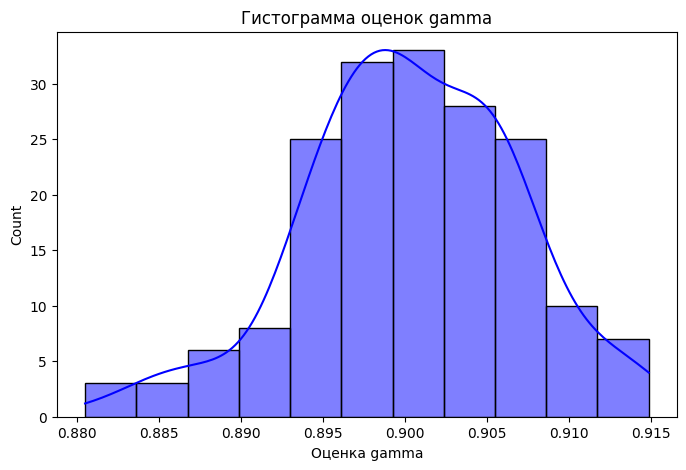

In [6]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(K_items, kde=True, color='blue')
plt.title("Гистограмма оценок gamma")
plt.xlabel("Оценка gamma")
plt.show()

In [2]:
dicpercia = gamma* (1-gamma)/M
print(dicpercia)

4.6153846153846145e-05


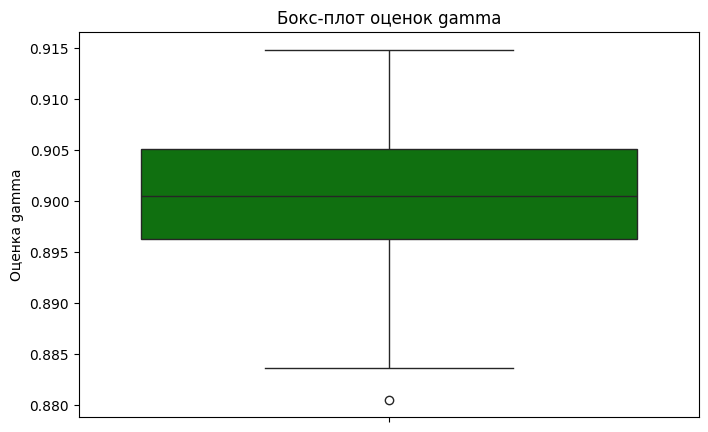

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=K_items, color='green')
plt.title("Бокс-плот оценок gamma")
plt.ylabel("Оценка gamma")
plt.show()

# Касательно закона распределения оценки, она может быть асимптотически 
# нормальной в соответствии с (ЦПТ) - сумма большого количества независимых 
# и одинаково распределенных случайных величин (независимых и одинаково 
# распределенных выборочных средних) будет приближаться к нормальному 
# распределению, независимо от исходного распределения случайных величин.

3. Смоделировать M выборок из n значений случайной величины W, закон распределения которой указан в Вашем варианте. По каждой из M выборок с надежностью найти интервальную оценку (доверительный интервал) для дисперсии случайной величины W. По результатам моделирования найти точечную оценку надежности.


In [9]:
from scipy.stats import  chi2
k1 = 3
k2 = 5
n1= 1000
count = 0
w_variance = (2 * k2**2 * (k1 + k2 - 2)) / (k1 * (k2 - 2)**2 * (k2 - 4)) / n1
from scipy.stats import f


for i in range(0, M):
    
    sample_W = []
    for j in range(0, n):
        U_values = np.random.f(k1, k2, size=n1)
        W = (1/n1) * np.sum(U_values, axis=0)
        sample_W.append(W)
    
    # Вычисляем выборочную дисперсию
    sample_variance = np.var(sample_W, ddof=1)   
   
    
    alpha = 1 - gamma
    lower = (n - 1) * sample_variance / chi2.ppf((1 + gamma) / 2, n - 1)
    upper = (n - 1) * sample_variance / chi2.ppf((1 - gamma) / 2, n - 1)
    
    #границы доверительного интервала для дисперсии
    confidence_intervals = [lower, upper]

    if confidence_intervals[0]<=  w_variance and confidence_intervals[1]>= w_variance:
        count +=1

GAMMA = count/M
print(f'Точечная оценка надежности gamma:{GAMMA}')

Точечная оценка надежности gamma:0.8082051282051282


(array([0.6339223 , 2.95830407, 3.1696115 , 4.12049495, 3.38091893,
        1.79611318, 0.42261487, 0.31696115, 0.        , 0.10565372]),
 array([1.45734719, 1.5165027 , 1.57565822, 1.63481373, 1.69396925,
        1.75312476, 1.81228028, 1.87143579, 1.93059131, 1.98974682,
        2.04890234]),
 <BarContainer object of 10 artists>)

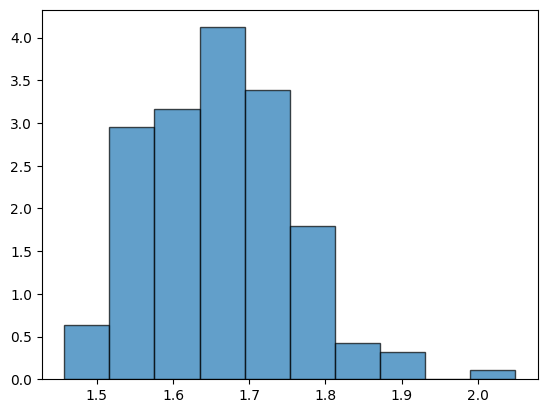

In [11]:
W = []
for i in range(10*n):
    U_samples = np.random.f(dfnum=k1, dfden=k2, size=n1)
    W.append(np.sum(U_samples, axis=0) / n1)
plt.hist(W, bins="scott", edgecolor='k', alpha=0.7, density=True)

4. Повторив пункт 3. 180 раз, получите массив из 180 значений оценки. Найдите выборочные числовые характеристики точечной оценки, постройте гистограмму относительных частот и бокс-плот. Каким может быть закон распределения оценки? 

In [12]:
k1 = 3
k2 = 5
n1= 1000
count = 0
w_variance = (2 * k2**2 * (k1 + k2 - 2)) / (k1 * (k2 - 2)**2 * (k2 - 4)) / n1

K_items3 = []

for _ in range(K):
    count = 0.0
    for i in range(0, M):
        
        sample_W = []
        for j in range(0, n):
            U_values = np.random.f(k1, k2, size=n1)
            W = (1/n1) * np.sum(U_values)
            sample_W.append(W)
        
        # Вычисляем выборочную дисперсию
        sample_variance = np.var(sample_W, ddof=1)   
    
        
        alpha = 1 - gamma
        lower = (n - 1) * sample_variance / chi2.ppf((1 + gamma) / 2, n - 1)
        upper = (n - 1) * sample_variance / chi2.ppf((1 - gamma) / 2, n - 1)
    
        #границы доверительного интервала для дисперсии
        confidence_intervals = [lower, upper]

        if confidence_intervals[0]<=  w_variance and confidence_intervals[1]>= w_variance:
            count +=1
        
  

    K_items3.append(count/M)


# Вычислим выборочные числовые характеристики оценок точечной надежности
mean_gamma_estimate = np.mean(K_items3)
variance_gamma_estimate = np.var(K_items3)
std_deviation_gamma_estimate = np.std(K_items3)

# Выводим результат
print("Выборочное среднее:", mean_gamma_estimate)
print("Выборочная дисперсия:", variance_gamma_estimate)
print("Выборочное стандартное отклонение:", std_deviation_gamma_estimate)

Выборочное среднее: 0.8017037037037037
Выборочная дисперсия: 7.613019374842742e-05
Выборочное стандартное отклонение: 0.008725261815465908


In [13]:
print(K_items3)

[0.8164102564102564, 0.8, 0.7984615384615384, 0.8076923076923077, 0.8066666666666666, 0.7953846153846154, 0.8025641025641026, 0.796923076923077, 0.8020512820512821, 0.8041025641025641, 0.7979487179487179, 0.8015384615384615, 0.8087179487179487, 0.8071794871794872, 0.8158974358974359, 0.7974358974358975, 0.7933333333333333, 0.7958974358974359, 0.8061538461538461, 0.8020512820512821, 0.7897435897435897, 0.7994871794871795, 0.7882051282051282, 0.8102564102564103, 0.7984615384615384, 0.7958974358974359, 0.8066666666666666, 0.7948717948717948, 0.8076923076923077, 0.8194871794871795, 0.7964102564102564, 0.8133333333333334, 0.8041025641025641, 0.801025641025641, 0.8184615384615385, 0.7907692307692308, 0.8041025641025641, 0.7923076923076923, 0.8164102564102564, 0.8107692307692308, 0.8092307692307692, 0.8076923076923077, 0.8, 0.7917948717948718, 0.8, 0.7958974358974359, 0.7923076923076923, 0.8051282051282052, 0.7902564102564102, 0.7938461538461539, 0.8046153846153846, 0.8143589743589743, 0.7969

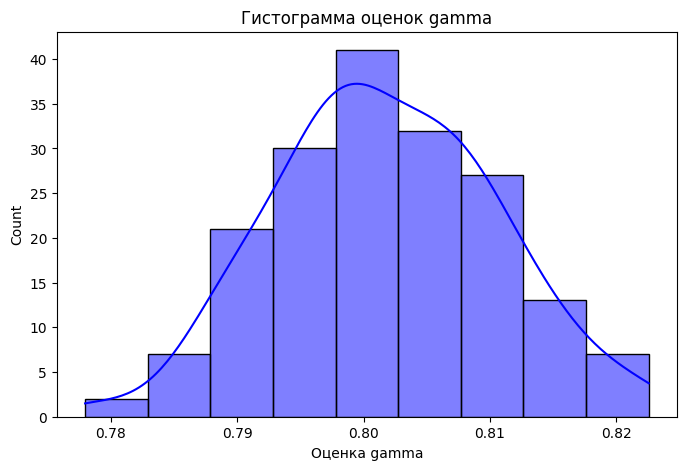

In [14]:
import seaborn as sns
# Построим гистограмму относительных частот
plt.figure(figsize=(8, 5))
sns.histplot(K_items3, bins = 'scott', kde=True, color='blue')
plt.title("Гистограмма оценок gamma")
plt.xlabel("Оценка gamma")
plt.show()


Медиана:  0.8012820512820513
IQR:  0.011923076923076925
Границы выбросов:  0.7778846153846154 0.8255769230769231


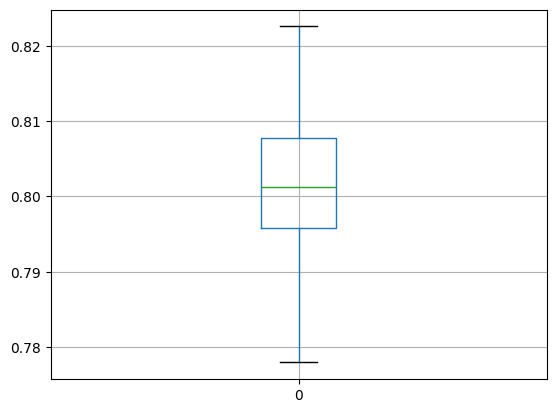

In [15]:
import pandas as pd
#plt.boxplot(data)
data_frame = pd.DataFrame(K_items3)
data_frame.boxplot()

w_median = np.median(K_items3)
w_q1 = np.percentile(K_items3, 25)
w_q3 = np.percentile(K_items3, 75)
w_iqr = w_q3 - w_q1

w_lower_bound = w_q1 - 1.5 * w_iqr
w_upper_bound = w_q3 + 1.5 * w_iqr

print()
print("Медиана: ", w_median)
print("IQR: ", w_iqr)
print("Границы выбросов: ", w_lower_bound, w_upper_bound)